In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('ggplot')
import os
import pandas as pd
import numpy as np 
import pickle as pk
import glob
from fbprophet import Prophet
import sys
sys.path.append('../')
import wiki
from wiki import utils 
import multiprocessing as mp
total_proc = None
from tqdm import tqdm
from IPython.display import clear_output

In [3]:
PROPHET_PATH = '../data/prophet/'
RESULTS_PATH = 'results/'
VERSION = 'v7/'

In [4]:
train = pd.read_csv('../data/'+'train_2.csv').drop('Page', axis=1)

In [5]:
train.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,37.0,58.0,25.0,23.0,25.0,47.0,44.0,26.0,24.0,21.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,14.0,34.0,16.0,31.0,34.0,33.0,32.0,29.0,34.0,25.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,6.0,23.0,11.0,8.0,6.0,13.0,12.0,8.0,12.0,9.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,21.0,42.0,23.0,17.0,11.0,21.0,20.0,20.0,110.0,15.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,41.0,25.0,22.0,20.0,24.0,29.0,20.0,17.0,24.0


In [6]:
example_forecast = pd.read_feather(PROPHET_PATH+VERSION+'1df.f')

In [8]:
example_forecast.columns

Index(['ds', 't', 'trend', 'seasonal_lower', 'seasonal_upper', 'trend_lower',
       'trend_upper', 'yhat_lower', 'yhat_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'seasonal',
       'yhat', 'yhat_org', 'y', 'y_org', 'train'],
      dtype='object')

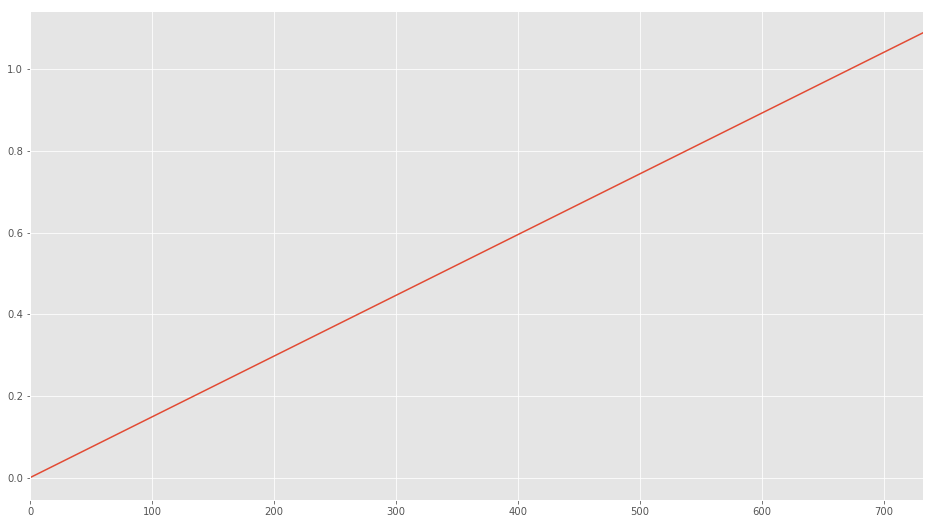

In [13]:
example_forecast.t.plot()

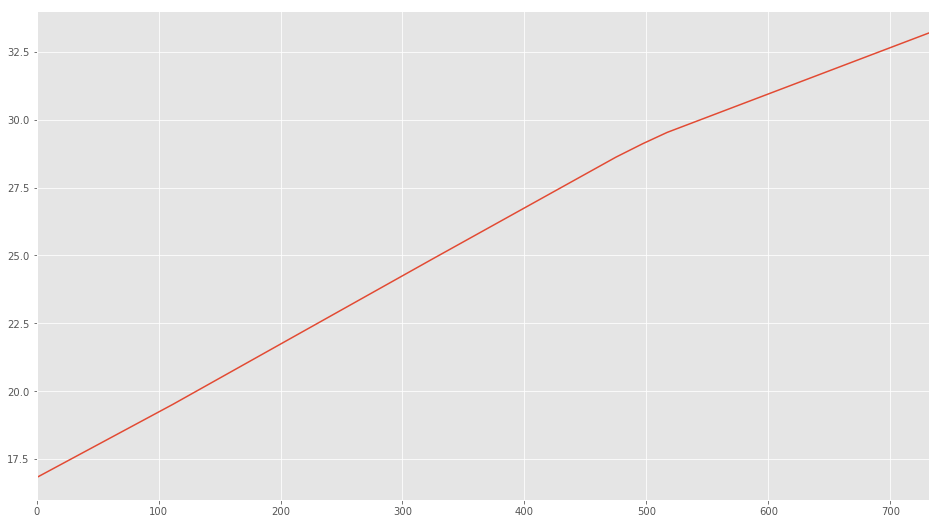

In [14]:
example_forecast.trend.plot()

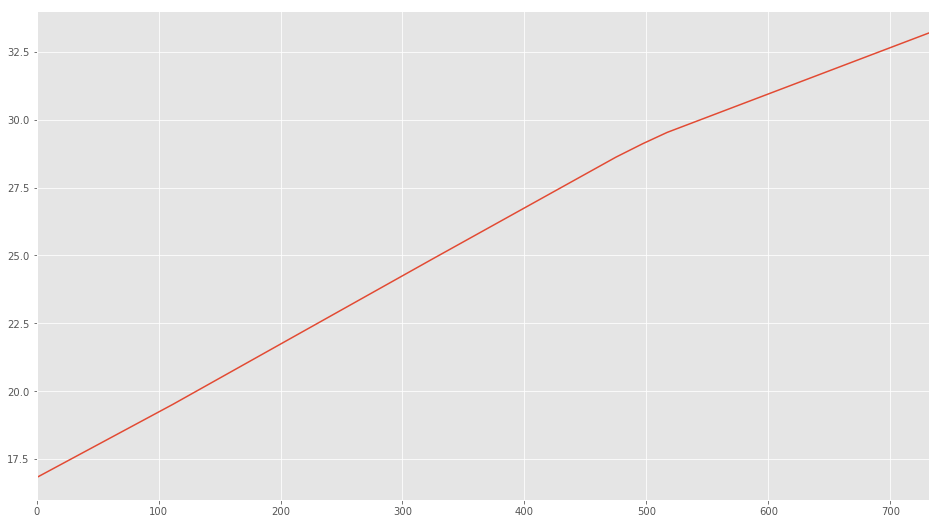

In [14]:
example_forecast.trend.plot()

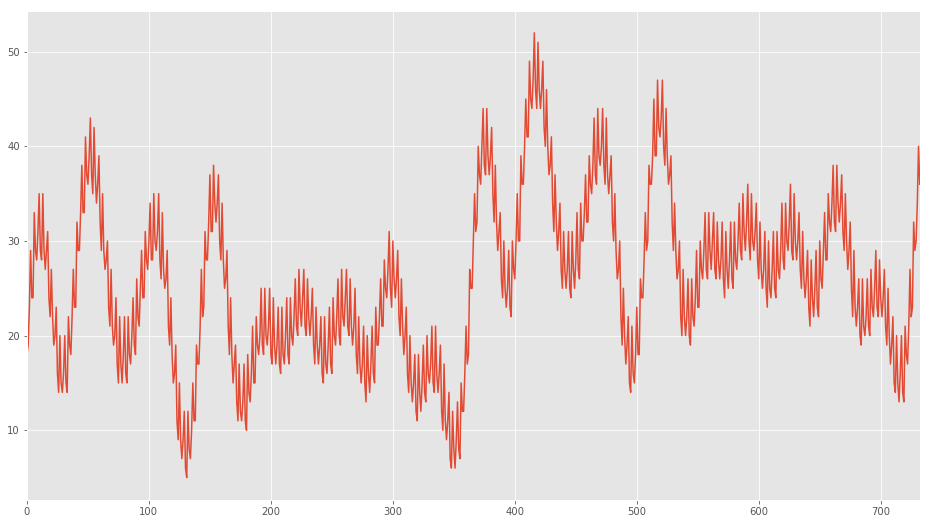

In [15]:
example_forecast.yhat.plot()

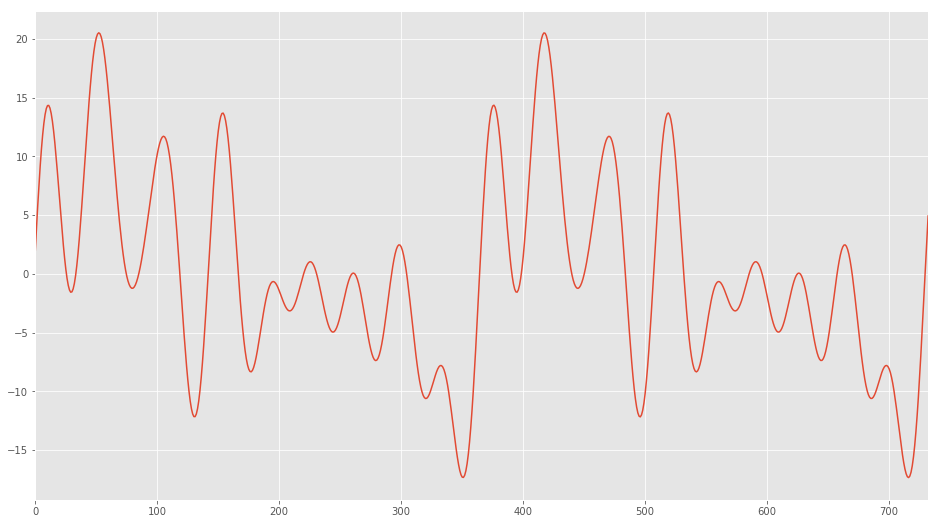

In [10]:
example_forecast.yearly.plot()

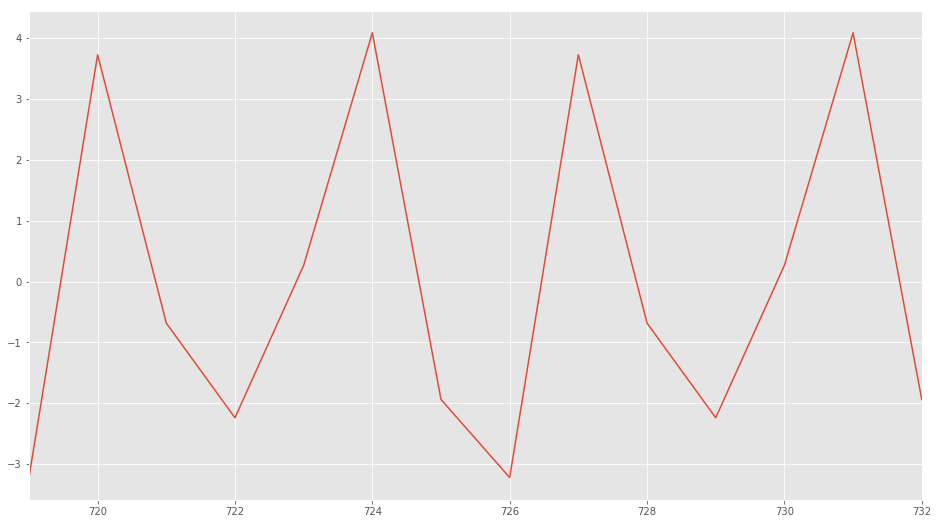

In [12]:
example_forecast.weekly[-14:].plot()

In [7]:
example_forecast.loc[:,['ds',]]

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,...,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat,yhat_org,y,y_org,train
0,2015-07-01,0.000000,16.827715,1.340478,1.340478,16.827715,16.827715,-18.143524,58.060591,-0.683214,...,-0.683214,2.023692,2.023692,2.023692,1.340478,18,18.168193,11.0,11.0,1.0
1,2015-07-02,0.001488,16.851791,1.743943,1.743943,16.851791,16.851791,-18.077381,61.199714,-2.239234,...,-2.239234,3.983178,3.983178,3.983178,1.743943,19,18.595734,14.0,14.0,1.0
2,2015-07-03,0.002976,16.875867,6.119249,6.119249,16.875867,16.875867,-13.693485,60.340106,0.266179,...,0.266179,5.853070,5.853070,5.853070,6.119249,23,22.995115,15.0,15.0,1.0
3,2015-07-04,0.004464,16.899943,11.688979,11.688979,16.899943,16.899943,-9.227273,66.446339,4.088541,...,4.088541,7.600438,7.600438,7.600438,11.688979,29,28.588922,18.0,18.0,1.0
4,2015-07-05,0.005952,16.924018,7.256056,7.256056,16.924018,16.924018,-14.517216,63.232055,-1.938774,...,-1.938774,9.194831,9.194831,9.194831,7.256056,24,24.180075,11.0,11.0,1.0
5,2015-07-06,0.007440,16.948094,7.387042,7.387042,16.948094,16.948094,-17.777715,58.967082,-3.221971,...,-3.221971,10.609013,10.609013,10.609013,7.387042,24,24.335137,13.0,13.0,1.0
6,2015-07-07,0.008929,16.972170,15.548102,15.548102,16.972170,16.972170,-4.543916,71.936114,3.728474,...,3.728474,11.819628,11.819628,11.819628,15.548102,33,32.520272,22.0,22.0,1.0
7,2015-07-08,0.010417,16.996246,12.124551,12.124551,16.996246,16.996246,-11.959746,66.608063,-0.683214,...,-0.683214,12.807765,12.807765,12.807765,12.124551,29,29.120797,11.0,11.0,1.0
8,2015-07-09,0.011905,17.020322,11.320182,11.320182,17.020322,17.020322,-13.079610,67.581095,-2.239234,...,-2.239234,13.559417,13.559417,13.559417,11.320182,28,28.340504,10.0,10.0,1.0
9,2015-07-10,0.013393,17.044398,14.332004,14.332004,17.044398,17.044398,-11.223618,67.606350,0.266179,...,0.266179,14.065825,14.065825,14.065825,14.332004,31,31.376401,4.0,4.0,1.0


In [ ]:
def load_prophet_prop(VERSION, prop):
    pd.read_feather(PROPHET_PATH+VERSION+'1df.f')
    return df

In [2]:
example_forecast = pd.read_feather(PROPHET_PATH+VERSION+'1df.f')

NameError: name 'pd' is not defined

In [35]:
example_forecast[example_forecast.train == 0]

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,...,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat,yhat_org,y,y_org,train
703,2017-06-03,1.001425,33.673337,-4.096913,-4.096913,33.673337,33.673337,-9.846985,69.279783,3.899298,...,3.899298,-7.996211,-7.996211,-7.996211,-4.096913,30,29.576424,31.0,31.0,0.0
704,2017-06-04,1.002849,33.695676,-10.591658,-10.591658,33.695676,33.695676,-11.820691,64.980430,-1.821685,...,-1.821685,-8.769973,-8.769973,-8.769973,-10.591658,23,23.104018,41.0,41.0,0.0
705,2017-06-05,1.004274,33.718016,-12.693242,-12.693242,33.718016,33.718016,-17.903584,56.943979,-3.062089,...,-3.062089,-9.631152,-9.631152,-9.631152,-12.693242,21,21.024774,21.0,21.0,0.0
706,2017-06-06,1.005698,33.740355,-7.216143,-7.216143,33.740355,33.740355,-11.502182,65.181015,3.343104,...,3.343104,-10.559246,-10.559246,-10.559246,-7.216143,27,26.524212,23.0,23.0,0.0
707,2017-06-07,1.007123,33.762695,-12.326911,-12.326911,33.762695,33.762695,-17.935626,59.580025,-0.796249,...,-0.796249,-11.530662,-11.530662,-11.530662,-12.326911,21,21.435784,22.0,22.0,0.0
708,2017-06-08,1.008547,33.785034,-14.503578,-14.503578,33.785028,33.785034,-17.045033,57.359924,-1.984291,...,-1.984291,-12.519287,-12.519287,-12.519287,-14.503578,19,19.281456,19.0,19.0,0.0
709,2017-06-09,1.009972,33.807374,-13.075234,-13.075234,33.807334,33.807392,-19.154010,59.362487,0.421913,...,0.421913,-13.497147,-13.497147,-13.497147,-13.075234,21,20.732140,20.0,20.0,0.0
710,2017-06-10,1.011396,33.829713,-10.535827,-10.535827,33.829638,33.829768,-14.459852,60.269742,3.899298,...,3.899298,-14.435124,-14.435124,-14.435124,-10.535827,23,23.293887,30.0,30.0,0.0
711,2017-06-11,1.012821,33.852053,-17.125406,-17.125406,33.851937,33.852176,-18.343147,55.751667,-1.821685,...,-1.821685,-15.303721,-15.303721,-15.303721,-17.125406,17,16.726647,34.0,34.0,0.0
712,2017-06-12,1.014245,33.874392,-19.135935,-19.135935,33.874235,33.874557,-22.195295,51.964916,-3.062089,...,-3.062089,-16.073846,-16.073846,-16.073846,-19.135935,15,14.738457,14.0,14.0,0.0


In [33]:
example_forecast.iloc[-90:-30]

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,...,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat,yhat_org,y,y_org,train
673,2017-05-04,0.958689,33.003154,-6.077062,-6.077062,33.003154,33.003154,-11.277502,67.349812,-1.984291,...,-1.984291,-4.092771,-4.092771,-4.092771,-6.077062,27,26.926091,27.0,27.0,1.0
674,2017-05-05,0.960114,33.025493,-4.543403,-4.543403,33.025493,33.025493,-8.395911,66.375367,0.421913,...,0.421913,-4.965317,-4.965317,-4.965317,-4.543403,28,28.482090,15.0,15.0,1.0
675,2017-05-06,0.961538,33.047833,-1.917553,-1.917553,33.047833,33.047833,-6.856900,70.115276,3.899298,...,3.899298,-5.816851,-5.816851,-5.816851,-1.917553,31,31.130280,22.0,22.0,1.0
676,2017-05-07,0.962963,33.070172,-8.448543,-8.448543,33.070172,33.070172,-13.778928,62.209710,-1.821685,...,-1.821685,-6.626858,-6.626858,-6.626858,-8.448543,25,24.621629,19.0,19.0,1.0
677,2017-05-08,0.964387,33.092512,-10.438315,-10.438315,33.092512,33.092512,-18.744128,57.657805,-3.062089,...,-3.062089,-7.376226,-7.376226,-7.376226,-10.438315,23,22.654196,34.0,34.0,1.0
678,2017-05-09,0.965812,33.114851,-4.704713,-4.704713,33.114851,33.114851,-9.239764,67.711725,3.343104,...,3.343104,-8.047817,-8.047817,-8.047817,-4.704713,28,28.410138,22.0,22.0,1.0
679,2017-05-10,0.967236,33.137190,-9.423228,-9.423228,33.137190,33.137190,-13.299627,64.793998,-0.796249,...,-0.796249,-8.626979,-8.626979,-8.626979,-9.423228,24,23.713963,24.0,24.0,1.0
680,2017-05-11,0.968661,33.159530,-11.086280,-11.086280,33.159530,33.159530,-14.931188,59.861533,-1.984291,...,-1.984291,-9.101988,-9.101988,-9.101988,-11.086280,22,22.073250,37.0,37.0,1.0
681,2017-05-12,0.970085,33.181869,-9.042499,-9.042499,33.181869,33.181869,-12.412434,62.446075,0.421913,...,0.421913,-9.464413,-9.464413,-9.464413,-9.042499,24,24.139370,13.0,13.0,1.0
682,2017-05-13,0.971510,33.204209,-5.810074,-5.810074,33.204209,33.204209,-10.709647,62.572410,3.899298,...,3.899298,-9.709372,-9.709372,-9.709372,-5.810074,27,27.394134,25.0,25.0,1.0


In [ ]:
example_forecast.eq

In [6]:
mediandf = pd.read_feather('../data/median_for_60_and_30.f') 

In [7]:
mediandf.page_index = mediandf.page_index.astype(int)
mediandf = mediandf.sort_values(by='page_index').reset_index().drop('index', axis=1)
mediandf.info()
mediandf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Data columns (total 11 columns):
page_index           145063 non-null int64
Page                 145063 non-null object
FINAL_median_pred    145063 non-null int64
median_pred_60       145063 non-null int64
median_pred_30       145063 non-null int64
smape_60_to_0        144151 non-null float64
smape_30_to_0        144113 non-null float64
smape_60_to_30       144137 non-null float64
nans_start_to_60     145063 non-null int64
nans_60_to_30        145063 non-null int64
nans_30_to_0         145063 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 12.2+ MB


,page_index,Page,FINAL_median_pred,median_pred_60,median_pred_30,smape_60_to_0,smape_30_to_0,smape_60_to_30,nans_start_to_60,nans_60_to_30,nans_30_to_0
0,0,2NE1_zh.wikipedia.org_all-access_spider,22,24,22,32.278432,33.460075,31.784579,0,0,0
1,1,2PM_zh.wikipedia.org_all-access_spider,19,24,18,42.847863,38.381387,47.778097,0,0,0
2,2,3C_zh.wikipedia.org_all-access_spider,3,3,3,64.305367,66.482751,62.127983,0,0,0
3,3,4minute_zh.wikipedia.org_all-access_spider,14,15,14,32.250349,34.090675,31.105196,0,0,0
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,16,14,12,48.547274,63.728757,42.661346,291,0,0


In [9]:
v6 = pd.read_feather(PROPHET_PATH+RESULTS_PATH+'v6df.f'); 
v6.page_index = v6.page_index.astype(int)
v6 = v6.sort_values(by='page_index').reset_index().drop('index', axis=1)
v6 = v6.drop('v6_train', axis=1)
print(v6.shape)
print(v6.info())
print(v6.v6_val.mean())
v6.head()

(145063, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Data columns (total 2 columns):
page_index    145063 non-null int64
v6_val        144196 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.2 MB
None
99.8531845693


,page_index,v6_val
0,0,31.961856
1,1,61.550763
2,2,162.870370
3,3,74.371935
4,4,132.702086


In [10]:
v6t = pd.read_feather(PROPHET_PATH+RESULTS_PATH+'v6tdf.f')
v6t.page_index = v6t.page_index.astype(int)
v6t = v6t.sort_values(by='page_index').reset_index().drop('index', axis=1)
v6t = v6t.drop('v6t_train', axis=1)
print(v6t.shape)
print(v6t.info())
print(v6t.v6t_val.mean())
v6t.head()

(145063, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Data columns (total 2 columns):
page_index    145063 non-null int64
v6t_val       144113 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.2 MB
None
91.9486794124


,page_index,v6t_val
0,0,33.687425
1,1,79.017942
2,2,118.306120
3,3,47.967008
4,4,99.351753


In [11]:
df = v6.merge(v6t, on='page_index'); print(df.shape)
df = df.merge(mediandf, on='page_index'); print(df.shape)
df['val_gain'] = df.smape_60_to_30 - df.v6_val
df['test_gain'] = df.smape_30_to_0 - df.v6t_val; df.head()

(145063, 3)


,page_index,v6_val,v6t_val
0,0,31.961856,33.687425
1,1,61.550763,79.017942
2,2,162.870370,118.306120
3,3,74.371935,47.967008
4,4,132.702086,99.351753


# New Game - Find the serieses where Median did bad a year ago over that period
* then try using prophet for those instead
* or where prophet did better than it a year ago?

* DO
    * Find median SMAPE scores over period of 2017-05-04 - 2017-07-02
        * Make function which gets median SMAPE over 60 day period
    * Try choosing those medians that do worse than prophet? Unlikely to be good as prophet is training on that
    * Try choosing worst X?
    * Try choosing worst X with a limit for small numbers worries giving huge SMAPES

In [37]:
train = pd.read_csv('../data/train_2.csv').drop('Page', axis=1); train.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,37.0,58.0,25.0,23.0,25.0,47.0,44.0,26.0,24.0,21.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,14.0,34.0,16.0,31.0,34.0,33.0,32.0,29.0,34.0,25.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,6.0,23.0,11.0,8.0,6.0,13.0,12.0,8.0,12.0,9.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,21.0,42.0,23.0,17.0,11.0,21.0,20.0,20.0,110.0,15.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,41.0,25.0,22.0,20.0,24.0,29.0,20.0,17.0,24.0


In [ ]:
def get_preds_for_period(period):
    return np.nan_to_num(np.round(
                np.nanmedian(
                train.iloc[:,:period].values[:, -49:], axis=1)).reshape(-1,1)).astype(int)

In [ ]:
def median_SMAPE_for_period(period):
    denominator = train2.iloc[:,-60:].add(median_df.median_pred_60, axis=0) / 200
    diff = np.abs(train2.iloc[:,-60:].subtract(median_df.median_pred_60, axis=0)) / denominator
    diff[denominator == 0] = 0.0
    #return np.nanmean(diff, axis=0)
    return diff.mean(axis=1, skipna=True)